In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('/content/cancer.csv')
ds.head()

,id,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Pre-processing

In [3]:
#Check the number of unique value from all of the object datatype
ds.select_dtypes(include ='object').nunique()

## M for malignant (cancerous),
## B for benign (non-cancerous)

Diagnosis    2
dtype: int64

In [4]:
# Remove id column
ds.drop(columns = 'id', inplace=True)
ds.head()

,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA

In [5]:
ds.describe()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
## getting info about dataset / null values, dtypes

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   Perimeter_mean           569 non-null    float64
 4   Area_mean                569 non-null    float64
 5   Smoothness_mean          569 non-null    float64
 6   Compactness_mean         569 non-null    float64
 7   Concavity_mean           569 non-null    float64
 8   Concave points_mean      569 non-null    float64
 9   Symmetry_mean            569 non-null    float64
 10  Fractal_dimension_mean   569 non-null    float64
 11  Radius_se                569 non-null    float64
 12  Texture_se               569 non-null    float64
 13  Perimeter_se             569 non-null    float64
 14  Area_se                  5

<ipython-input-7-6db32df987d8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =ds.corr()


<Axes: >

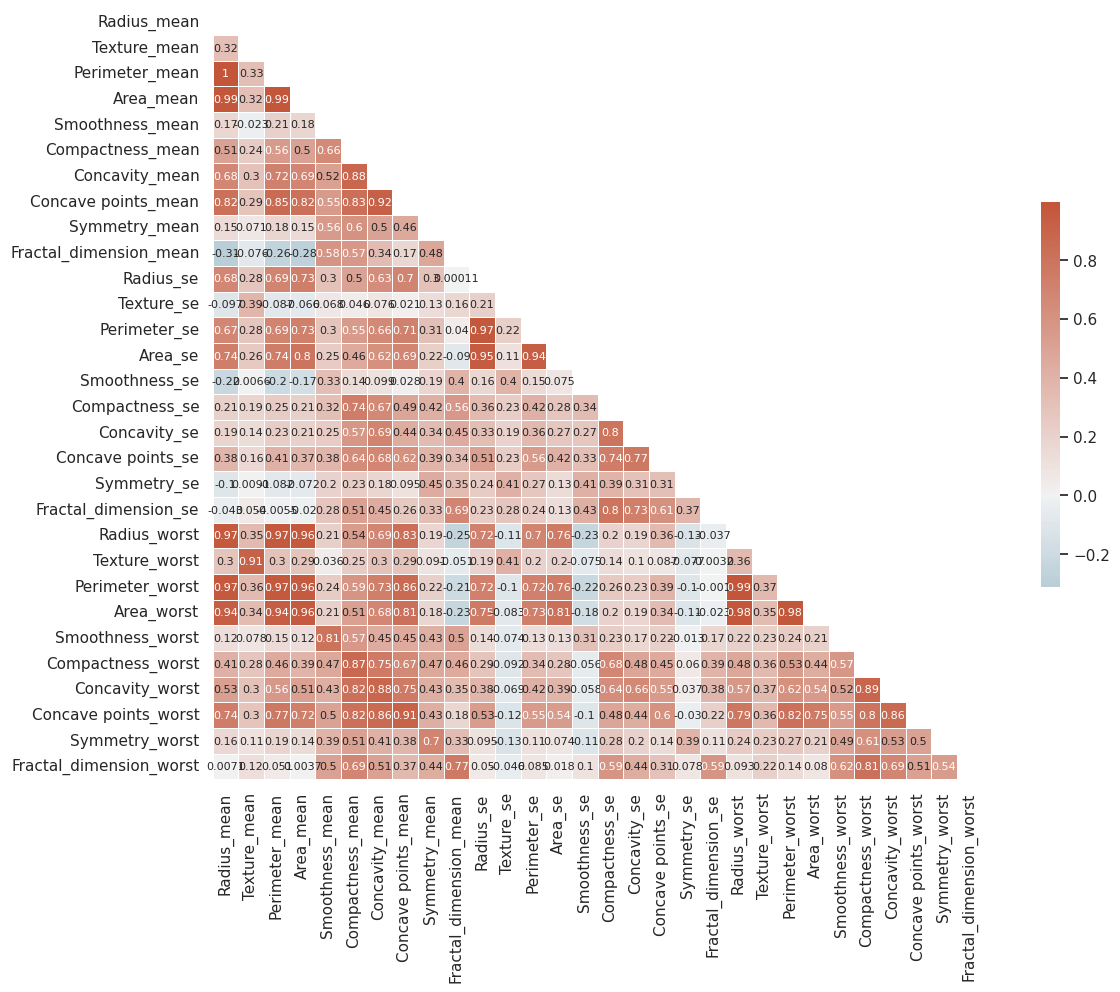

In [7]:
## Checking correlation between features
sns.set_theme(style='white')

corr =ds.corr()

mask = np.triu(np.ones_like(corr, dtype =bool))

f,ax = plt.subplots(figsize=(15, 10))

cmap =sns.diverging_palette(230,20, as_cmap =True)


sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})


In [8]:
## Some variables are highly correlated, therefore these variables will be removed from dataset

## Radius directly impacts to area and perimeter, therefore area and perimenet features are removed

ds.drop(['Perimeter_mean', 'Area_mean', 'Perimeter_se', 'Area_se', 'Perimeter_worst', 'Area_worst' ],axis=1, inplace=True)
ds.head()

,Diagnosis,Radius_mean,Texture_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,Radius_se,...,Symmetry_se,Fractal_dimension_se,Radius_worst,Texture_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Creating model baseline

In [9]:
## it seems model is slightly imbalanced, so our base for accuracy will be 62.7%
ds['Diagnosis'].value_counts()/ds.shape[0]

B    0.627417
M    0.372583
Name: Diagnosis, dtype: float64

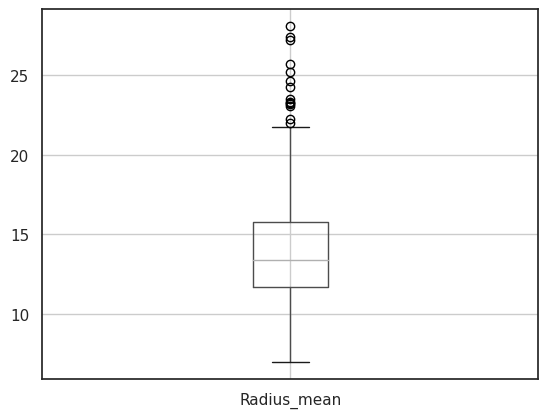

In [10]:
ds.boxplot(column=['Radius_mean'])
plt.show()

In [11]:
## it seems some features have outliers, lets treat these outliers

## Additional data pre-processing

In [12]:
## Removing outliers are required for some models (NB and LG). This function is for removing outliers from train data sets

from scipy import stats

def z_score_removal (X,y, columns, z_score):
  ds = pd.concat([X,y], axis=1)
  col_ds = ds[columns]
  z_scores =scipy.stats.zscore(col_ds).abs()
  outliers =(z_scores.max(axis=1) >z_score)
  ds_out =ds[~outliers]
  X_cleaned =ds_out[X.columns]
  y_cleaned =ds_out.drop(X.columns, axis=1)
  return X_cleaned, y_cleaned

In [13]:
## Train and Test split
from sklearn.model_selection import train_test_split

X=ds.drop(['Diagnosis'], axis=1)
y =ds.loc[:, 'Diagnosis'].map({'M':1, 'B':0}).astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

Below algorthims will be used to model

1. NaiveBayes - GaussianNB
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. XGBoost

in order to save time, one of highest accuracy provided models will be tuned further

In [14]:
## Imputing continous variables for Naive Bayes

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
import scipy

nb_preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
    ]), X.columns)
],remainder = 'passthrough', verbose_feature_names_out= False).set_output(transform='pandas')

data_transformed = nb_preprocessor.fit_transform(X_train)
nb_X_train, nb_y_train = z_score_removal(data_transformed, y_train, X.columns, 3)


In [15]:
## Naive Bayes Code - GaussianNB will be prefferd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV

nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, nb_X_train, nb_y_train, cv=5)
print(nb_scores)

nb_model.fit(nb_X_train, nb_y_train)
test_score_nb = nb_model.score(nb_X_train, nb_y_train)

print(f"Test score (accuracy): {test_score_nb}")

[0.87341772 0.93670886 0.92405063 0.92405063 0.92405063]
Test score (accuracy): 0.9164556962025316


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [16]:
## Pipeline for Logistic regression

lr_preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), X.columns)
],remainder = 'passthrough', verbose_feature_names_out= False).set_output(transform='pandas')

lr_transformed = lr_preprocessor.fit_transform(X_train)
lr_X_train, lr_y_train = z_score_removal(lr_transformed, y_train, X.columns, 3)

In [17]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

lr_model = LogisticRegression()
lr_scores = cross_val_score(lr_model, lr_X_train, lr_y_train, cv=5, scoring='accuracy')
print(lr_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.         0.98734177 0.94936709 0.97468354 0.92405063]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
## pipeline for trees (Decision, Random Forest, XGBoost) - outlier removal is not required, so naive bayes pipeline is enough

tree_X_train = nb_preprocessor.fit_transform(X_train)

In [19]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, tree_X_train, y_train, cv=5, scoring='accuracy')
print(dt_scores)

[0.93406593 0.93406593 0.96703297 0.9010989  0.93406593]


In [20]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, tree_X_train, y_train, cv=5, scoring='accuracy')
print(rf_scores)



[0.97802198 0.94505495 0.97802198 0.96703297 0.94505495]


In [21]:
## XGBoost
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# XGBoost with default parameters
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_scores = cross_val_score(xgb_model, tree_X_train.values, y_train.values, cv=5, scoring='accuracy')
print(xgb_scores)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[0.96703297 0.96703297 0.98901099 0.96703297 0.94505495]


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [22]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_X_train = lr_transformed.copy() # KNN is same as Logistic regression, but dont require outlier removal
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, knn_X_train, y_train, cv=5, scoring='accuracy')
print(knn_scores)

[0.96703297 0.94505495 0.96703297 0.97802198 0.94505495]


## Model Evaluation

In [23]:
X_test_Nb = nb_preprocessor.transform(X_test).values
X_test_LR = lr_preprocessor.transform(X_test).values

In [24]:
nb_model.fit(nb_X_train, nb_y_train)
lr_model.fit(lr_X_train, lr_y_train)
dt_model.fit(tree_X_train, y_train)
rf_model.fit(tree_X_train, y_train)
xgb_model.fit(tree_X_train.values, y_train.values)
knn_model.fit(knn_X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier()

In [25]:
from sklearn.metrics import accuracy_score

# Naive Bayes
y_pred_nb = nb_model.predict(X_test_Nb)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb}")

# Logistic Regression
y_pred_lr = lr_model.predict(X_test_LR)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr}")

# Decision Tree
y_pred_dt = dt_model.predict(X_test_Nb)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt}")

# Random Forest
y_pred_rf = rf_model.predict(X_test_Nb)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_Nb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb}")

# KNN
y_pred_knn = knn_model.predict(X_test_LR)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn}")

Naive Bayes Accuracy: 0.9649122807017544
Logistic Regression Accuracy: 0.9649122807017544
Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.956140350877193
XGBoost Accuracy: 0.956140350877193
KNN Accuracy: 0.956140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
# As the accuracies are quite good for Logistic regression and Naive Bayes models (96.5%), Logistic regression model will be checked for further tuning

In [27]:
## Logistic Regression

# Parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(lr_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(lr_X_train, lr_y_train)
test_score_lr = grid_search_lr.best_estimator_.score(lr_X_train, lr_y_train)

print(f"Best penalty value: {grid_search_lr.best_params_['penalty']}")
print(f"Best C value: {grid_search_lr.best_params_['C']}")
print(f"Best solver value: {grid_search_lr.best_params_['solver']}")
print(f"Best max_iter value: {grid_search_lr.best_params_['max_iter']}")
print(f"Best accuracy: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best penalty value: l2
Best C value: 0.1
Best solver value: liblinear
Best max_iter value: 100
Best accuracy: 0.9721518987341773


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [32]:
lr_model = LogisticRegression(penalty='l2',
    C= 0.1,
    solver='liblinear',
    max_iter= 100)
lr_scores = cross_val_score(lr_model, lr_X_train, lr_y_train, cv=5, scoring='accuracy')
print(lr_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.98734177 0.98734177 0.96202532 0.98734177 0.93670886]


In [34]:
# Logistic Regression

lr_model.fit(lr_X_train, lr_y_train)
y_pred_lr = lr_model.predict(X_test_LR)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr}")


Logistic Regression Accuracy: 0.9736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
